In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms, utils
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

In [22]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
DEVICE

device(type='cuda')

In [23]:
EPOCHS = 20
BATCH_SIZE = 64

In [24]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [25]:
trainset = datasets.MNIST(
    root      = '../../data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.MNIST(
    root      = '../../data/', 
    train     = False,
    download  = True,
    transform = transform
)

In [26]:
print(len(trainset), len(testset))
train_loader = data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE
)
test_loader = data.DataLoader(
    dataset     = testset,
    batch_size  = BATCH_SIZE
)

60000 10000


In [27]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

torch.Size([64, 1, 28, 28])
torch.Size([3, 224, 224])


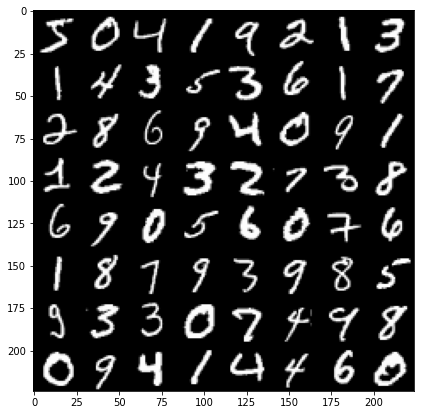

In [28]:
print(images.shape) # torch.Size([64, 1, 28, 28])
img   = utils.make_grid(images, padding=0)
npimg = img.numpy()
print(img.shape)    # torch.Size([3, 224, 224])
plt.figure(figsize=(10, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()

In [29]:
print(labels)

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])


In [30]:
print(trainset.classes)
CLASSES = dict()
for i in range(10) :
    CLASSES[i] = trainset.classes[i][4:]
print(CLASSES)


for i, label in enumerate(labels):
    index = label.item()
    print("{:12}".format(CLASSES[index]), end=' ')
    if i % 8 == 7:
        print()

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
{0: 'zero', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five', 6: 'six', 7: 'seven', 8: 'eight', 9: 'nine'}
five         zero         four         one          nine         two          one          three        
one          four         three        five         three        six          one          seven        
two          eight        six          nine         four         zero         nine         one          
one          two          four         three        two          seven        three        eight        
six          nine         zero         five         six          zero         seven        six          
one          eight        seven        nine         three        nine         eight        five         
nine         three        three        zero         seven        four         nine         eight        
zero         nine         four   

(28, 28)


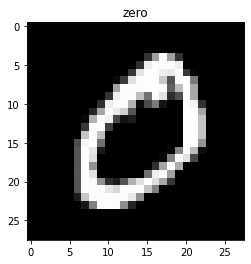

In [31]:
idx = 1

item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

## 아래 함수를 완성해보세요. 활용이 가능하신 분은 Baseline으로 제시된 성능 보다 더 나은 성능을 내보세요.

In [32]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(784, 10)

        
        
                      
    def forward(self, x):
        x = x.view(-1, 784)  # 64 * 28 * 28 -> 64 * 784
        x = self.fc1(x)
        
        
        
        return x


In [40]:
model        = Net().to(DEVICE)
optimizer    = optim.SGD(model.parameters(), lr=0.01)

from torchsummary import summary
summary(model, (64, 1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.22
----------------------------------------------------------------


In [34]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [35]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()
            pred = output.max(1, keepdim=True)[1]  # max value, argmax
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [36]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

[1] Test Loss: 0.6019, Accuracy: 86.79%
[2] Test Loss: 0.4770, Accuracy: 88.29%
[3] Test Loss: 0.4266, Accuracy: 89.11%
[4] Test Loss: 0.3980, Accuracy: 89.54%
[5] Test Loss: 0.3791, Accuracy: 89.96%
[6] Test Loss: 0.3655, Accuracy: 90.31%
[7] Test Loss: 0.3551, Accuracy: 90.50%
[8] Test Loss: 0.3469, Accuracy: 90.70%
[9] Test Loss: 0.3402, Accuracy: 90.83%
[10] Test Loss: 0.3345, Accuracy: 90.92%
[11] Test Loss: 0.3297, Accuracy: 91.04%
[12] Test Loss: 0.3256, Accuracy: 91.17%
[13] Test Loss: 0.3220, Accuracy: 91.26%
[14] Test Loss: 0.3187, Accuracy: 91.28%
[15] Test Loss: 0.3159, Accuracy: 91.38%
[16] Test Loss: 0.3133, Accuracy: 91.49%
[17] Test Loss: 0.3110, Accuracy: 91.55%
[18] Test Loss: 0.3089, Accuracy: 91.58%
[19] Test Loss: 0.3070, Accuracy: 91.64%
[20] Test Loss: 0.3052, Accuracy: 91.68%


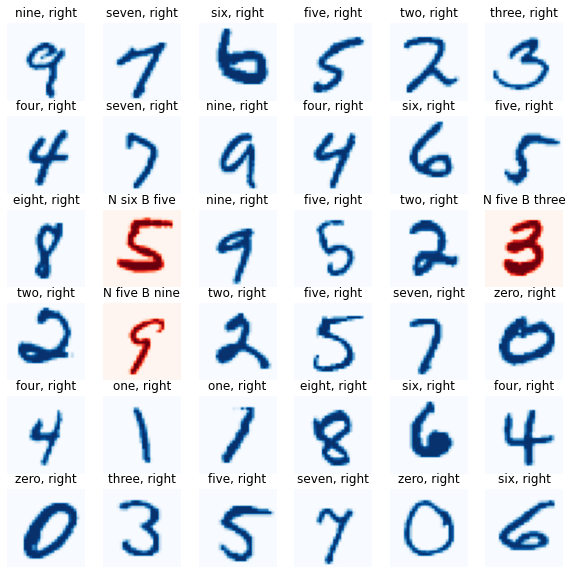

In [37]:
columns = 6
rows = 6
fig = plt.figure(figsize=(10,10))
 
model.eval()
for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(testset))
    input_img = testset[data_idx][0].unsqueeze(dim=0).to(DEVICE) 
 
    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = CLASSES[argmax.item()]
    label = CLASSES[testset[data_idx][1]]
    
    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + ', right')
        cmap = 'Blues'
    else:
        plt.title('N ' + pred + ' B ' +  label)
        cmap = 'Reds'
    plot_img = testset[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    plt.axis('off')
    
plt.show() 